<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/ProjectPart3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 3



I will continue to use the error computing functions defined in project part 1 and 2 as well as the Lagrange Interpolation

In [5]:
import math

pi = math.pi
sqrt2 = math.sqrt(2)

def absoluteError(estimate, actualValue):
  return actualValue - estimate

def relativeError(estimate, actualValue):
  return absoluteError(estimate, actualValue)/actualValue

def approximateError(previousEstimate, currentEstimate):
  return currentEstimate - previousEstimate

def relativeApproximateError(previousEstimate, currentEstimate):
  return abs(approximateError(previousEstimate, currentEstimate)/currentEstimate)

def generalTaylorCoefficient(degree):
  return (-1)**(math.floor(degree/2))/(sqrt2*math.factorial(degree))

def taylorPolynomialTerm(degree, input):
  return generalTaylorCoefficient(degree)*(input-pi/4)**degree

def taylorPolynomial(degree, input):
  sum = 0
  for i in range(0, degree+1):
    sum = sum +  taylorPolynomialTerm(i, input)
  return sum

def lagrangeCoefficient(inputArray,outputArray,entry,variable):
  lc = 1
  for i in range(len(inputArray)):
    if i == entry:
      continue
    else:
      lc = lc*(variable - inputArray[i])/(inputArray[entry]-inputArray[i])
  return lc

def lagrangeInterpolator(inputArray, outputArray, variable):
  li = 0
  for i in range(len(inputArray)):
    li = li + lagrangeCoefficient(inputArray,outputArray,i,variable)*outputArray[i]
  return li

inputValues = [pi/4,pi/4+.1,pi/4+.2,pi/2]
outputValues = [math.sin(x) for x in inputValues]



## Newton-Rapshon Method

The Newton-Rapshon requires the symbolic knowledge of the first derivative.  Here I will be looking at the $\sin x$ function and we know it's derivative to be $\cos x$.

The process will be iterative with the first given and all next steps computed as
$$
x_{i+1}= x_i-\frac{f(x_i)}{f'(x_i)}
$$
We are looking for an $x$ where $\left|f(x)\right|<\epsilon$ but we need to watch out for the derivative being 0 and non-convergent sequences.

In [125]:
def newtonIterator(function, derivative, currentValue):
  return currentValue - function(currentValue)/derivative(currentValue)

def newton(function, derivative, initial, tolerrance, maxIterations):
  x = initial
  for counter in range(maxIterations):
    if derivative(x) == 0:
    #  print('Zero derivative, no solution')
      return None
    if abs(function(x))< tolerrance:
      return [x,counter]
    x = newtonIterator(function, derivative, x)
 # print('Max iterations exceeded')
  return None

In [111]:
newton(math.sin,math.cos,pi/4,.00001,20)


[-1.2602253593105295e-08, 3]

In [108]:
newton(math.sin,math.cos,pi/2,.00001,20)

Max iterations exceeded


In [128]:
seedValues = [pi/4,pi/2,pi/4+.1,1,3,10,15,3*pi/2+.01,pi+.01]
roots = []
iterations = []
for seed in seedValues:
  if newton(math.sin,math.cos,seed,1e-10,20) != None:
    roots.append(newton(math.sin,math.cos,seed,1e-10,20)[0])
    iterations.append(newton(math.sin,math.cos,seed,1e-10,20)[1])
  else:
    roots.append('None Found')
    iterations.append('>20')


In order to make a beautiful table I am going to use the package plotly.  It is useful for creating visualizations.

In [129]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = go.Figure(data=[go.Table(
                header=dict(values=['Seeds', 'Roots', 'Iterations']),
                 cells=dict(values = [seedValues,roots,iterations]))
                     ])
fig.show()

We see that at $\frac\pi2$ it does not converge.  Also interestingly $\frac{3\pi}2+0.1$ almost does not converge, but finds a root out at $33\pi$.  My impression is that that was luck.

In [131]:
roots[-2]/pi

33.0

##Lagrange Interpolation

In [ ]:
def lagrangeCoefficient(inputArray,outputArray,entry,variable):
  lc = 1
  for i in range(len(inputArray)):
    if i == entry:
      continue
    else:
      lc = lc*(variable - inputArray[i])/(inputArray[entry]-inputArray[i])
  return lc

def lagrangeInterpolator(inputArray, outputArray, variable):
  li = 0
  for i in range(len(inputArray)):
    li = li + lagrangeCoefficient(inputArray,outputArray,i,variable)*outputArray[i]
  return li


I have chosen to break my code into two pieces.  My first function will compute the coeffiecent for any choice and the second actually builds the Lagrange Interpolator.  Next I define the three points that I will pass my interpolator and I will graph the result as well.

In [ ]:
inputValues = [pi/4,pi/4+.1,pi/2]
outputValues = [math.sin(x) for x in inputValues]



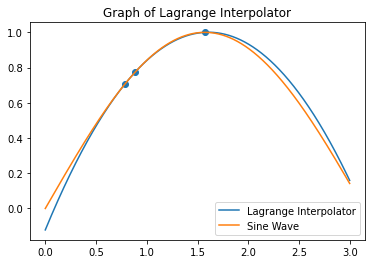

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange( 0,3,.001)
plt.scatter(inputValues,outputValues)
plt.plot(x,lagrangeInterpolator(inputValues,outputValues,x))
plt.plot(x, np.sin(x))
plt.title('Graph of Lagrange Interpolator')
plt.legend(['Lagrange Interpolator', 'Sine Wave'])

plt.show()


To finish I need to do some error analysis of the interpolator and the derivative of it.

In [ ]:
functionErrors = [absoluteError(lagrangeInterpolator(inputValues,outputValues,pi/4+.2),math.sin(pi/4+.2)),relativeError(lagrangeInterpolator(inputValues,outputValues,pi/4+.2),math.sin(pi/4+.2))]

In [ ]:
functionErrors

[0.0009511088336823237, 0.0011411131212949398]

I use the textbook to write the second derivative of the 3 point lagrange interpolation.  I don't believe this will be useful (nor generalizable) so I simply write the second derivative in our case.  It is constant here!

In [ ]:
secondDerivativeOfLagrangeInterpolation = 2*outputValues[0]/((inputValues[0]-inputValues[1])*(inputValues[0]-inputValues[2]))+2*outputValues[1]/((inputValues[1]-inputValues[0])*(inputValues[1]-inputValues[2]))+2*outputValues[2]/((inputValues[2]-inputValues[0])*(inputValues[2]-inputValues[1]))

In [ ]:
secondDerivativeOfLagrangeInterpolation

-0.8686330376211258

In [ ]:
secondDerivativeErrors = [absoluteError(secondDerivativeOfLagrangeInterpolation,-1/sqrt2),relativeError(secondDerivativeOfLagrangeInterpolation,-1/sqrt2)]

In [ ]:
secondDerivativeErrors

[0.1615262564345783, -0.22843262252913507]

Not a great estimate of the second derivative!